# Healthcare Lab (Non-linear Functional Forms)

**Learning Objectives:**
  * Define and fit simple regression models with multiple factors and non-linear functional forms
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt


In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [6]:
# We need to compute the variable: "AgeAtMedicalEvent"
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [7]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

### 3. Impact of age and  Medical Treatment Duration on total costs (Log-Level Model)
#### We are interested in determining the impact of the factors: age and medical treatment duration on the total cost of medical interventions. To do this we fit a model regressing these variables on the log of 'TotalExpenses'

In [8]:
HealthCareDataSet[['MedicalClaim','TotalExpenses','AgeAtMedicalEvent','MedicalTreatmentDuration']]

,MedicalClaim,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
0,c1e3436737c77899,15.148,52.657084,0
1,c1e3436737c77899,3.073,52.657084,0
2,c1e3436737c77899,123.900,52.657084,0
3,c1e3436737c77899,7.511,52.657084,0
4,c1e3436737c77899,8.631,52.657084,0
...,...,...,...,...
52558,90e8ae169cbba3bd,2436.000,80.637919,7
52559,8b6a8d2720d16e97,2075.500,70.258727,4
52560,8b6a8d2720d16e97,865.900,70.258727,4
52561,8b6a8d2720d16e97,665.000,70.258727,4


In [9]:
#we need to compute the totalExpenses incurred by each MedicalClaim
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby(['MedicalClaim']).agg({'TotalExpenses':'sum','MedicalTreatmentDuration':'mean','AgeAtMedicalEvent':'mean'})
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)
HealthCareDataSetGroupedByMedicalClaim.head(3)

,TotalExpensesPerClaim,MedicalTreatmentDuration,AgeAtMedicalEvent
MedicalClaim,,,
0012a8eb3c2be5f5,4668.692,0.0,64.232717
002fd7d73d8060f1,53501.259,6.0,74.863792
003886fc8ec986d4,17115.714,0.0,64.380561


#### 3.1. Model Fit
##### We impose a simple, linear, model:
##### We specify the log of  TotalExpensesPerClaim as the response variable. We set AgeAtMedicalEvent and MedicalTreatmentDuration as the independent variables

In [10]:

reg = smf.ols(formula='np.log(TotalExpensesPerClaim) ~ AgeAtMedicalEvent+MedicalTreatmentDuration', data=HealthCareDataSetGroupedByMedicalClaim)

In [11]:
#We fit the model
results = reg.fit()

In [12]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                   8.513480
AgeAtMedicalEvent           0.011754
MedicalTreatmentDuration    0.169181
dtype: float64



In [13]:
results.rsquared

0.35469397902708233

#### 3.2. Model Interpretation
##### Based on the previous we have fitted the following model:

$ log(TotalExpensesPerClaim)=8.51+0.0117*AgeAtMedicalEvent+0.169*MedicalTreatmentDuration+u $

#### This means that an increment of one unit in the variable `AgeAtMedicalEvent` increases the variable `TotalExpensesPerClaim` by 0.0117%

#### This means that an increment of one unit in the variable `MedicalTreatmentDuration` increases the variable `TotalExpensesPerClaim` by 0.16%


#### The value of R-squared is 0.35, this means that our model explains 35% of the total variance.


#### 3.3. t-Test
##### We perform a t-Test for each independent variable under consideration. The good news is that the library statsmodel does it for us.


In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(TotalExpensesPerClaim)   R-squared:                       0.355
Model:                                       OLS   Adj. R-squared:                  0.354
Method:                            Least Squares   F-statistic:                     922.9
Date:                           Wed, 31 Jul 2024   Prob (F-statistic):          3.95e-320
Time:                                   09:16:22   Log-Likelihood:                -5211.1
No. Observations:                           3361   AIC:                         1.043e+04
Df Residuals:                               3358   BIC:                         1.045e+04
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.5135      0.111     76.953      0.000       8.297       8.730
AgeAtMedicalEvent            0.0118      0.002      7.628      0.000       0.009       0.015
MedicalTreatmentDuration     0.1692      0.004     41.201      0.000       0.161       0.177
==============================================================================
Omnibus:                     1458.422   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33759.567
Skew:                          -1.525   Prob(JB):                         0.00
Kurtosis:                      18.224   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Based on the previous table we conclude that:
#### (1) the p-value associated with the factor `AgeAtMedicalEvent` is close to zero (0.000) and therefore we can safely reject the null hypotheses. In practice this means that the factor `AgeAtMedicalEvent` is statistically relevant as far as determining the Total Expenses per Claim is concerned.

#### (2) the p-value associated with the factor `MedicalTreatmentDuration` is close to zero (0.0000) and therefore we REJECT the null hypotheses. In practice this means that the factor `MedicalTreatmentDuration` IS  statistically relevant as far as determining the Total Expenses per Claim is concerned.



#### 3.4. F-Test
##### We perform a F-Test for the whole model. The good news is that the library statsmodel does it for us.

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(TotalExpensesPerClaim)   R-squared:                       0.355
Model:                                       OLS   Adj. R-squared:                  0.354
Method:                            Least Squares   F-statistic:                     922.9
Date:                           Wed, 31 Jul 2024   Prob (F-statistic):          3.95e-320
Time:                                   09:23:09   Log-Likelihood:                -5211.1
No. Observations:                           3361   AIC:                         1.043e+04
Df Residuals:                               3358   BIC:                         1.045e+04
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.5135      0.111     76.953      0.000       8.297       8.730
AgeAtMedicalEvent            0.0118      0.002      7.628      0.000       0.009       0.015
MedicalTreatmentDuration     0.1692      0.004     41.201      0.000       0.161       0.177
==============================================================================
Omnibus:                     1458.422   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33759.567
Skew:                          -1.525   Prob(JB):                         0.00
Kurtosis:                      18.224   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Given the results of the F-statistic (922.9) and its associated p-value (0.000) as shown in the previous table we conclude that the model is statistically significant (not all Beta coefficients are ZERO at the same time)

### 4. Impact of age and  Medical Treatment Duration on total costs (Log-Level Model with quadratic elements)
#### We are interested in determining the impact of the factors: age and medical treatment duration on the total cost of medical interventions. To do this we fit a model regressing these variables on the log of 'TotalExpenses', htis time however we add a quadratic term

In [17]:
#we need to compute the totalExpenses incurred by each MedicalClaim
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby(['MedicalClaim']).agg({'TotalExpenses':'sum','MedicalTreatmentDuration':'mean','AgeAtMedicalEvent':'mean'})
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)
HealthCareDataSetGroupedByMedicalClaim.head(3)

,TotalExpensesPerClaim,MedicalTreatmentDuration,AgeAtMedicalEvent
MedicalClaim,,,
0012a8eb3c2be5f5,4668.692,0.0,64.232717
002fd7d73d8060f1,53501.259,6.0,74.863792
003886fc8ec986d4,17115.714,0.0,64.380561


#### 4.1. Model Fit
##### We impose a simple, linear, model:
##### We specify the log of  TotalExpensesPerClaim as the response variable. We set AgeAtMedicalEvent and MedicalTreatmentDuration as the independent variables, we add a quadratic term

In [43]:

reg = smf.ols(formula='np.log(TotalExpensesPerClaim) ~ AgeAtMedicalEvent+MedicalTreatmentDuration+np.power(MedicalTreatmentDuration,2)', data=HealthCareDataSetGroupedByMedicalClaim)

In [44]:
#We fit the model
results = reg.fit()

In [45]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                                8.560213
AgeAtMedicalEvent                        0.008590
MedicalTreatmentDuration                 0.261225
np.power(MedicalTreatmentDuration, 2)   -0.002061
dtype: float64



In [46]:
results.rsquared

0.4575538111618621

#### 4.2. Model Interpretation
##### Based on the previous we have fitted the following model:

$ log(TotalExpensesPerClaim)=8.56+0.00859*AgeAtMedicalEvent+0.261*MedicalTreatmentDuration-0.0020*MedicalTreatmentDuration^2+u $

#### This means that an increment of one unit in the variable `AgeAtMedicalEvent` increases the variable `TotalExpensesPerClaim` by 0.0085%

#### The interpretation on the impact of the factor `MedicalTreatmentDuration` is not straightforward given that we have a quadratic term involved.


#### The value of R-squared is 0.45, this means that our model explains 45% of the total variance.

#### 4.3. t-Test
##### We perform a t-Test for each independent variable under consideration. The good news is that the library statsmodel does it for us.


In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(TotalExpensesPerClaim)   R-squared:                       0.458
Model:                                       OLS   Adj. R-squared:                  0.457
Method:                            Least Squares   F-statistic:                     943.9
Date:                           Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                                   09:51:20   Log-Likelihood:                -4919.3
No. Observations:                           3361   AIC:                             9847.
Df Residuals:                               3357   BIC:                             9871.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 8.5602      0.101     84.367      0.000       8.361       8.759
AgeAtMedicalEvent                         0.0086      0.001      6.056      0.000       0.006       0.011
MedicalTreatmentDuration                  0.2612      0.005     49.825      0.000       0.251       0.272
np.power(MedicalTreatmentDuration, 2)    -0.0021   8.17e-05    -25.230      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      178.237   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.233
Skew:                          -0.546   Prob(JB):                     1.11e-47
Kurtosis:                       3.595   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Based on the previous table we conclude that:
#### (1) the p-value associated with the factor `AgeAtMedicalEvent` is close to zero (0.000) and therefore we can safely reject the null hypotheses. In practice this means that the factor `AgeAtMedicalEvent` is statistically relevant as far as determining the Total Expenses per Claim is concerned.

#### (2) the p-value associated with the factor `MedicalTreatmentDuration` is close to zero (0.0000) and therefore we REJECT the null hypotheses. In practice this means that the factor `MedicalTreatmentDuration` IS  statistically relevant as far as determining the Total Expenses per Claim is concerned.

#### (2) the p-value associated with the factor `MedicalTreatmentDuration^2` is close to zero (0.0000) and therefore we REJECT the null hypotheses. In practice this means that the factor `MedicalTreatmentDuration^2` IS  statistically relevant as far as determining the Total Expenses per Claim is concerned. Given the statistical significance of the quadratic effect associated with the factor `MedicalTreatmentDuration` we conclude that the duration of medical treatment has a diminishing effect (i.e. the relationship between the number of days in hospital and total costs is not linear but subject to a negative quadratic effect)

<Axes: xlabel='MedicalTreatmentDuration', ylabel='TotalExpensesPerClaim'>

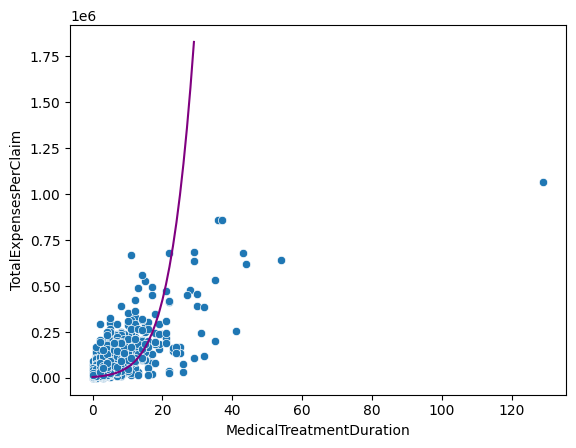

In [48]:
import math
sns.scatterplot(data=HealthCareDataSetGroupedByMedicalClaim, x='MedicalTreatmentDuration',y='TotalExpensesPerClaim')


DurationValues=[item for item in range(0,50,1)]

yHat=[math.exp(8.56+0.26*item-0.002*item*item) for item in range(0,30,1)]

sns.lineplot( yHat,color='purple')
